In [410]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


In [411]:
#read the file
df1 = pd.read_csv('banknifty_train_csv.csv')
df2 = pd.read_csv('banknifty_test_csv.csv')
df_frame = [df1,df2]
df = pd.concat(df_frame)
#print the head
df.tail()

,Date,Open,High,Low,Close,Volume,Turnover
16,2018-10-25,24841.50,24977.35,24696.85,24817.45,215033794.0,6.855910e+10
17,2018-10-26,24771.85,24771.95,24353.10,24421.05,219130974.0,5.370590e+10
18,2018-10-29,24647.95,25023.75,24404.55,24959.70,279844102.0,8.145830e+10
19,2018-10-30,24924.75,25121.50,24686.85,24807.75,257591034.0,6.320860e+10
20,2018-10-31,24823.80,25201.30,24528.35,25153.25,241789641.0,6.831520e+10


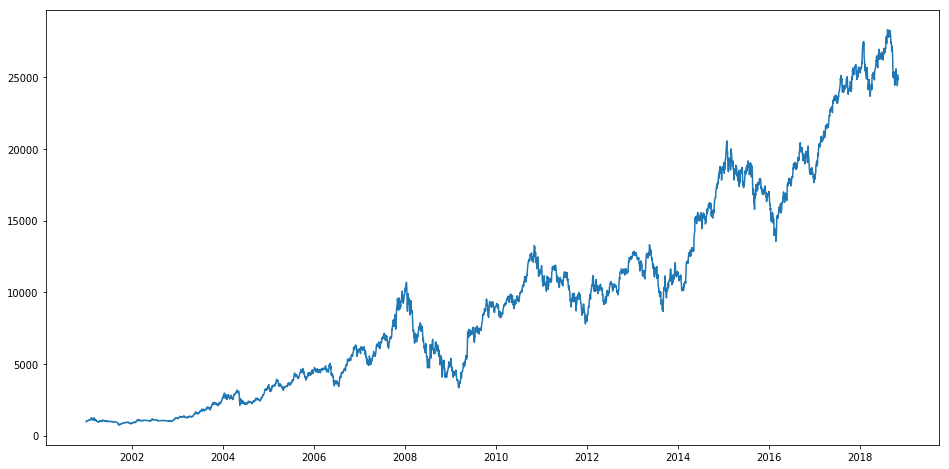

In [412]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [413]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [414]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [415]:
upto =len(new_data)-248
dataset = new_data.values
print(upto)
train = new_data[:upto]
valid = dataset[upto:,:]
print(len(valid))


4191
248


In [416]:
new_data.shape, train.shape, valid.shape
len(new_data) -len(valid)

4191

In [417]:
inputs = new_data[len(new_data) - len(valid) :].values



In [418]:
inputs.shape


(248, 1)

In [419]:
inputs = inputs.reshape(-1,1)

In [420]:
inputs.shape


(248, 1)

In [421]:
inputs  = scaler.fit_transform(inputs)

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [422]:
4191+79-60

4210

In [423]:
4191+79

4270

In [424]:
new_data.iloc[[4210,4269]]

,Close
Date,
2017-11-28,25846.4
2018-02-22,24955.2


In [425]:
val = len(new_data) - len(valid)
print(val)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    if i ==79:
        print(data[(val+i-60):val+i])
X_test = np.array(X_test)



4191
                 Date      Open      High       Low     Close       Volume  \
Date                                                                         
2017-11-28 2017-11-28  25830.45  25953.50  25795.50  25846.40   84399131.0   
2017-11-29 2017-11-29  25829.65  25877.75  25746.80  25795.70   74982549.0   
2017-11-30 2017-11-30  25693.80  25700.85  25246.85  25332.40  141631632.0   
2017-12-01 2017-12-01  25409.55  25441.35  25152.65  25191.95   87545844.0   
2017-12-04 2017-12-04  25295.05  25297.20  24993.35  25075.10   75646330.0   
2017-12-05 2017-12-05  25030.75  25217.70  24921.30  25124.85   85698111.0   
2017-12-06 2017-12-06  25066.30  25077.45  24813.60  24851.80   72791908.0   
2017-12-07 2017-12-07  24935.30  25097.40  24875.35  25057.25   60226256.0   
2017-12-08 2017-12-08  25145.50  25367.70  25145.50  25321.15   74109991.0   
2017-12-11 2017-12-11  25434.75  25448.85  25318.70  25404.85   57217432.0   
2017-12-12 2017-12-12  25413.40  25416.20  25108.60  25125.

In [426]:
X_test


array([[0.39144227, 0.37786046, 0.4259076 , ..., 0.72496559, 0.80011184,
        0.80182166],
       [0.37786046, 0.4259076 , 0.40879861, ..., 0.80011184, 0.80182166,
        0.81195157],
       [0.4259076 , 0.40879861, 0.35065382, ..., 0.80182166, 0.81195157,
        0.82330738],
       ...,
       [0.85254646, 0.8973245 , 0.88045208, ..., 0.29976772, 0.24669864,
        0.161444  ],
       [0.8973245 , 0.88045208, 0.84441672, ..., 0.24669864, 0.161444  ,
        0.27729267],
       [0.88045208, 0.84441672, 0.79265958, ..., 0.161444  , 0.27729267,
        0.24461244]])

In [427]:
X_test.shape

(188, 60)

In [428]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [429]:
X_test.shape

(188, 60, 1)

In [430]:
from keras.models import model_from_json
import os
no_of_days = 90
symbol = "BANKNIFTY_30"
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
## load weights into new model
loaded_model.load_weights(symbol+".h5")
print("Loaded model from disk")
# 
## evaluate loaded model on test data
loaded_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
#
score = loaded_model.predict(X_test)
print(score)
score = scaler.inverse_transform(score)
print(score)

Loaded model from disk
[[0.7550066 ]
 [0.79280317]
 [0.8202036 ]
 [0.8263483 ]
 [0.82785016]
 [0.81848925]
 [0.7707045 ]
 [0.702503  ]
 [0.62612236]
 [0.5546545 ]
 [0.5096279 ]
 [0.4639128 ]
 [0.4383898 ]
 [0.41095302]
 [0.3926974 ]
 [0.37118953]
 [0.3487285 ]
 [0.32279128]
 [0.30302888]
 [0.29036722]
 [0.2975102 ]
 [0.32815778]
 [0.3511748 ]
 [0.35576707]
 [0.34324768]
 [0.32205528]
 [0.28559098]
 [0.23663278]
 [0.20439838]
 [0.17764331]
 [0.17254114]
 [0.18100558]
 [0.19890712]
 [0.21583565]
 [0.21756406]
 [0.20280236]
 [0.18035519]
 [0.16164322]
 [0.14327395]
 [0.11036399]
 [0.09831621]
 [0.10487075]
 [0.11242557]
 [0.12183994]
 [0.13763262]
 [0.13896853]
 [0.1580388 ]
 [0.18628667]
 [0.22270386]
 [0.26187792]
 [0.29006702]
 [0.31232813]
 [0.32789826]
 [0.34246537]
 [0.35414475]
 [0.3524677 ]
 [0.3462967 ]
 [0.33136487]
 [0.31600767]
 [0.30636147]
 [0.291457  ]
 [0.28523114]
 [0.2995495 ]
 [0.3260302 ]
 [0.35494572]
 [0.3815251 ]
 [0.40404317]
 [0.42948014]
 [0.4615069 ]
 [0.4929065

In [431]:
score.shape

(188, 1)

In [432]:
valid.shape

(248, 1)

In [433]:
valid = new_data[len(new_data)-188:]


In [434]:
valid.shape

(188, 1)

In [435]:
valid['Predictions'] =0
valid['Predictions'] = score
print(len(valid))
valid

188


/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Close,Predictions
Date,,
2018-01-25,27445.7,27180.878906
2018-01-29,27498.5,27356.619141
2018-01-30,27269,27484.019531
2018-01-31,27379.5,27512.589844
2018-02-01,27220.7,27519.572266
2018-02-02,26451.2,27476.046875
2018-02-05,26098.8,27253.867188
2018-02-06,25811.3,26936.759766
2018-02-07,25670,26581.619141


In [436]:
#valid['Predictions'] = valid.Predictions.shift(15)
#print(len(valid))
#valid = valid[15:]
#valid

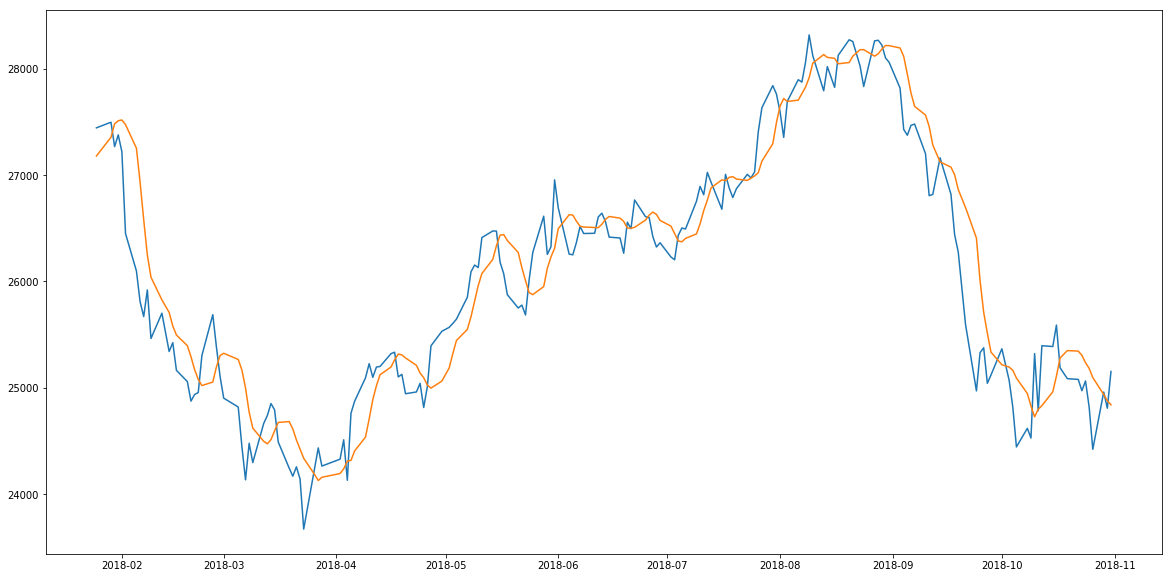

In [437]:
#plt.plot(train['Close'])
plt.plot(valid['Close'], label = "Close")
plt.plot(valid['Predictions'], label = "Prediction")
plt.show()

In [438]:
import numpy as np
date = np.array('2018-11-01', dtype=np.datetime64)
date
date15 =date + np.arange(no_of_days)
one1 = np.reshape(date15, (date15.shape[0]),1)
test_df = pd.DataFrame(index = one1)
valid = valid.append(test_df)
valid['Predictions'] = valid.Predictions.shift(no_of_days)
valid = valid[no_of_days:]

#valid['Predictions'] = score
#valid

/Users/sanjotraibagkar/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [439]:
valid

,Close,Predictions
2018-06-08,26451.3,27180.878906
2018-06-11,26453.5,27356.619141
2018-06-12,26607.1,27484.019531
2018-06-13,26642.8,27512.589844
2018-06-14,26562.2,27519.572266
2018-06-15,26417.4,27476.046875
2018-06-18,26409.3,27253.867188
2018-06-19,26265.8,26936.759766
2018-06-20,26557.7,26581.619141
2018-06-21,26497,26249.322266


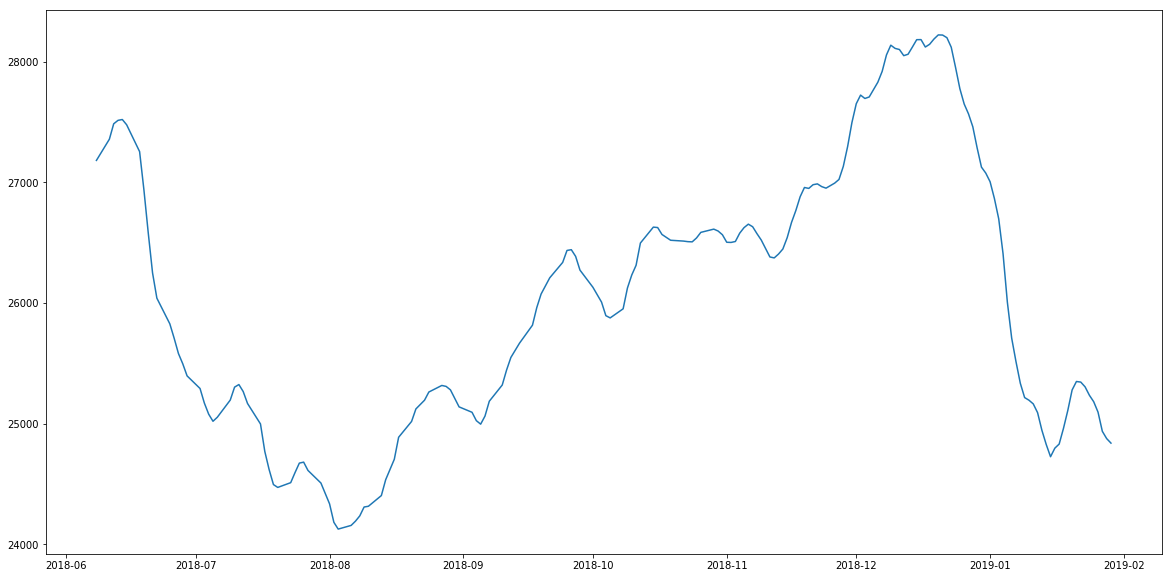

In [441]:
#plt.plot(train['Close'])
#plt.plot(valid['Close'], label = "Close")
plt.plot(valid['Predictions'], label = "Prediction")
plt.show()